<a href="https://colab.research.google.com/github/Saitejamacha/Data_Science_-_AI_ML/blob/main/Capstone_Project_Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/sample_data/Walmart DataSet.csv')

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [42]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Outlier', 'Week',
       'DayOfWeek', 'Weekly_Sales_Lag1', 'Weekly_Sales_Lag2',
       'Weekly_Sales_Lag4'],
      dtype='object')

#  1. You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following:

In [41]:
print("Missing values before handling:\n", df.isnull().sum())

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
print("\n'Date' column converted to datetime format.")

print("\nDescriptive statistics for the dataset:\n")
df.describe()

Missing values before handling:
 Store                0
Date                 0
Weekly_Sales         0
Holiday_Flag         0
Temperature          0
Fuel_Price           0
CPI                  0
Unemployment         0
Year                 0
Month                0
Outlier              0
Week                 0
DayOfWeek            0
Weekly_Sales_Lag1    0
Weekly_Sales_Lag2    0
Weekly_Sales_Lag4    0
dtype: int64

'Date' column converted to datetime format.

Descriptive statistics for the dataset:



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,DayOfWeek,Weekly_Sales_Lag1,Weekly_Sales_Lag2,Weekly_Sales_Lag4
count,6255.000000,6255,6.255000e+03,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.0,6.255000e+03,6.255000e+03,6.255000e+03
mean,23.000000,2011-07-01 00:00:00,1.046664e+06,0.064748,61.365244,3.377791,171.686133,7.981305,2010.992806,6.575540,26.374101,4.0,1.046413e+06,1.046917e+06,1.047619e+06
min,1.000000,2010-03-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.513000,126.064000,3.879000,2010.000000,1.000000,1.000000,4.0,2.099862e+05,2.099862e+05,2.099862e+05
25%,12.000000,2010-10-29 00:00:00,5.542012e+05,0.000000,48.610000,2.961000,131.901968,6.891000,2010.000000,4.000000,15.000000,4.0,5.542012e+05,5.540650e+05,5.538695e+05
50%,23.000000,2011-07-01 00:00:00,9.592291e+05,0.000000,63.440000,3.476000,182.658578,7.866000,2011.000000,7.000000,26.000000,4.0,9.592291e+05,9.601156e+05,9.604761e+05
75%,34.000000,2012-03-02 00:00:00,1.419414e+06,0.000000,75.325000,3.742500,212.964437,8.595000,2012.000000,9.000000,38.000000,4.0,1.419105e+06,1.419679e+06,1.421209e+06
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,52.000000,4.0,3.818686e+06,3.818686e+06,3.818686e+06
std,12.988211,NaN,5.642170e+05,0.246101,18.133689,0.450536,39.381670,1.875964,0.791168,3.194176,13.938938,0.0,5.641935e+05,5.646450e+05,5.654362e+05


In [43]:
print(df.isnull().sum())

Store                0
Date                 0
Weekly_Sales         0
Holiday_Flag         0
Temperature          0
Fuel_Price           0
CPI                  0
Unemployment         0
Year                 0
Month                0
Outlier              0
Week                 0
DayOfWeek            0
Weekly_Sales_Lag1    0
Weekly_Sales_Lag2    0
Weekly_Sales_Lag4    0
dtype: int64


# a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?.



In [6]:
overall_correlation = df['Weekly_Sales'].corr(df['Unemployment'])
print(f"Overall Pearson correlation between Weekly_Sales and Unemployment: {overall_correlation:.4f}")

Overall Pearson correlation between Weekly_Sales and Unemployment: -0.1062



* Correlation between 'Weekly_Sales' and 'Unemployment' for each store individually, then sort them to identify stores most and least affected.



In [7]:
store_correlations = df.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().unstack().iloc[:, 1]
print("Correlation between Weekly_Sales and Unemployment by Store:")
print(store_correlations.sort_values(ascending=True))

Correlation between Weekly_Sales and Unemployment by Store:
Store
38   -0.785290
44   -0.780076
39   -0.384681
42   -0.356355
41   -0.350630
4    -0.337015
17   -0.263600
3    -0.230413
37   -0.221287
5    -0.207043
43   -0.201954
9    -0.191534
13   -0.171633
7    -0.165382
40   -0.112528
32   -0.099455
1    -0.097955
20   -0.095341
23   -0.077169
16   -0.070864
26   -0.066899
31   -0.064738
8    -0.052580
11   -0.020339
27   -0.014275
24   -0.012261
12   -0.009286
25   -0.004958
45   -0.004041
34    0.017010
22    0.039043
6     0.044251
2     0.066325
15    0.078905
29    0.084682
33    0.101175
19    0.101464
10    0.131908
28    0.136671
18    0.139179
30    0.201862
14    0.210786
21    0.218367
35    0.483865
36    0.833734
Name: (Weekly_Sales, Unemployment), dtype: float64


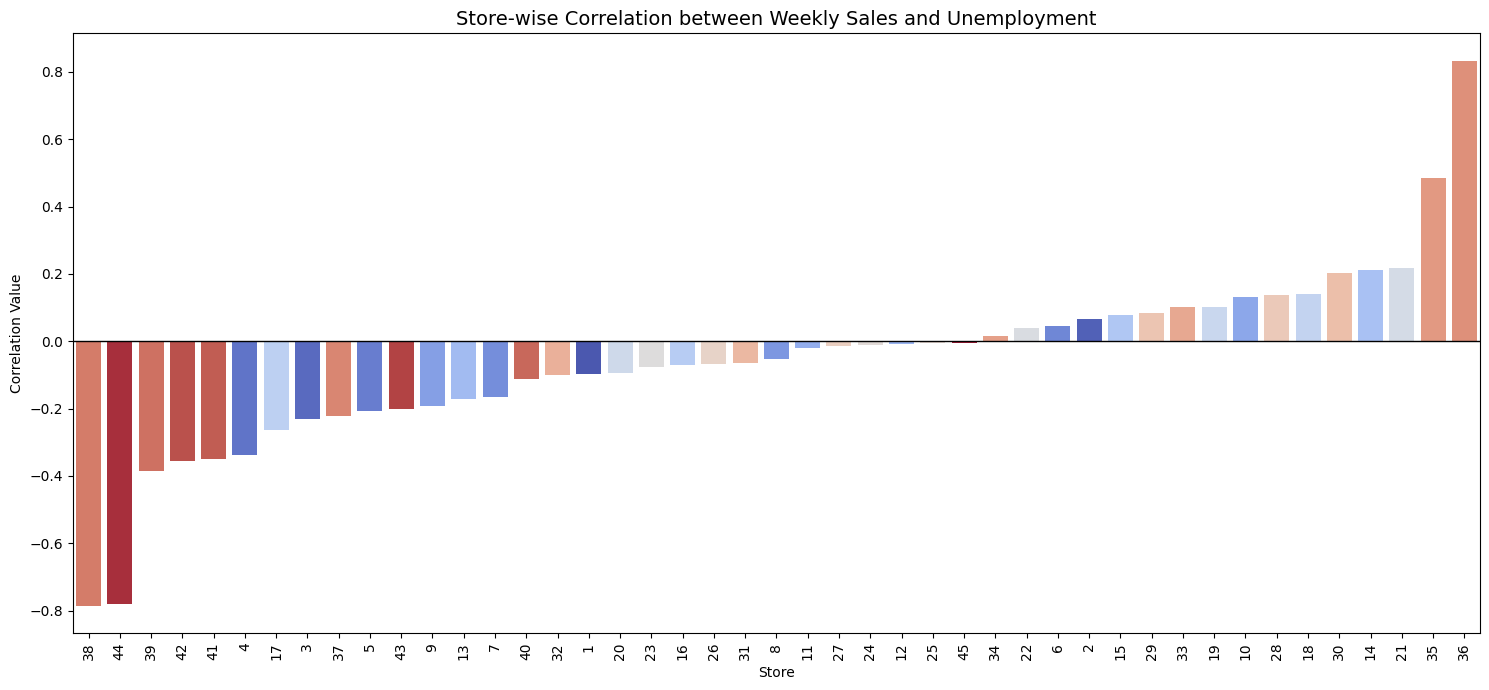

In [59]:
# Sort correlation ascending most negatively affected first
store_cor_sorted = store_correlations.sort_values(ascending=True)

# Converting to DataFrame for plotting
plot_df = store_cor_sorted.reset_index()
plot_df.columns = ['Store', 'Correlation']

plt.figure(figsize=(15,7))
sns.barplot(
    data=plot_df,
    x='Store',
    y='Correlation',
    hue='Store',
    palette='coolwarm',
    legend=False,
    order=plot_df['Store']
)

plt.xticks(rotation=90)
plt.axhline(0, color='black', linewidth=1)
plt.title("Store-wise Correlation between Weekly Sales and Unemployment", fontsize=14)
plt.ylabel("Correlation Value")
plt.xlabel("Store")
plt.tight_layout()
plt.show()


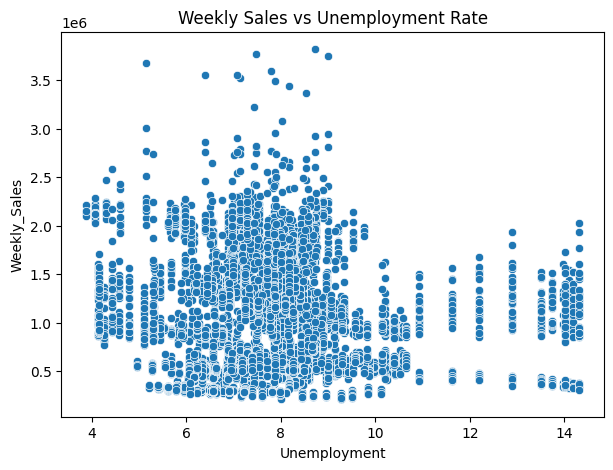

In [45]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df)
plt.title("Weekly Sales vs Unemployment Rate")
plt.show()


* Most Positive and Most Negative stores

<Figure size 1200x700 with 0 Axes>

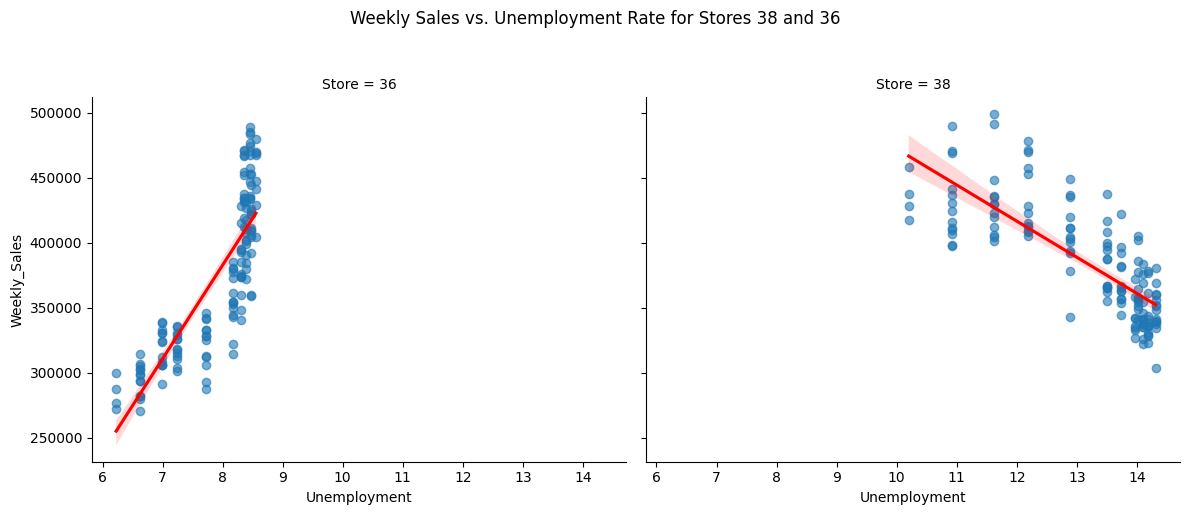

In [9]:
highest_negative_corr_store = store_correlations.idxmin()
highest_positive_corr_store = store_correlations.idxmax()

selected_stores_df = df[df['Store'].isin([highest_negative_corr_store, highest_positive_corr_store])]

plt.figure(figsize=(12, 7))
sns.lmplot(
    data=selected_stores_df,
    x='Unemployment',
    y='Weekly_Sales',
    col='Store',
    col_wrap=2,
    height=5,
    aspect=1.2,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)
plt.suptitle(f'Weekly Sales vs. Unemployment Rate for Stores {highest_negative_corr_store} and {highest_positive_corr_store}', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

##  b. If the weekly sales show a seasonal trend, when and what could be the reason

*
 Extracting the 'Year' and 'Month' from the 'Date' column to facilitate seasonal analysis and then create a line plot to visualize the overall 'Weekly_Sales' trend over time.



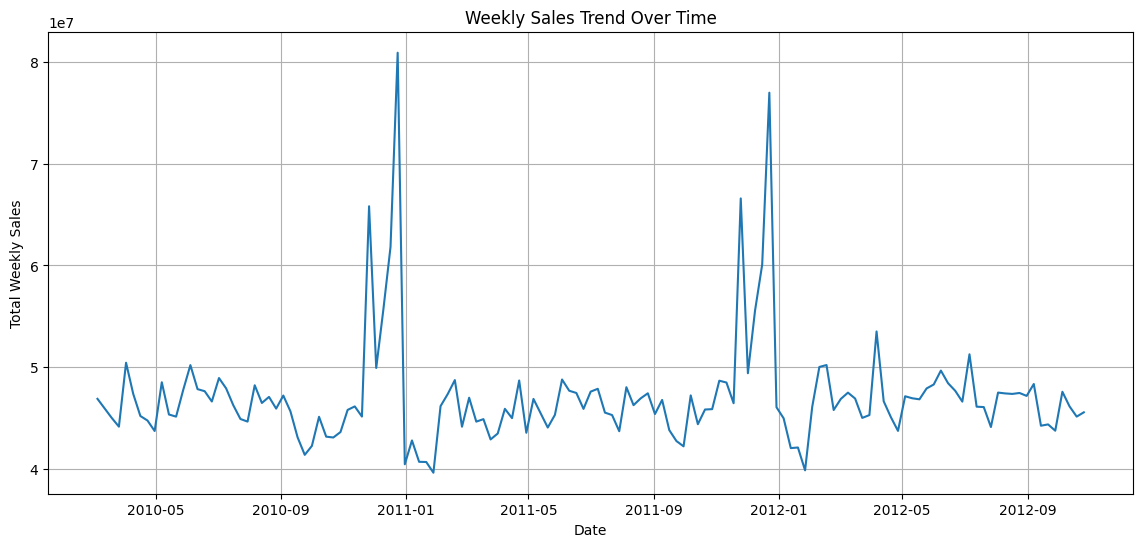

In [66]:
weekly_trend = df.groupby('Date')['Weekly_Sales'].sum()

plt.figure(figsize=(14,6))
plt.plot(weekly_trend.index, weekly_trend.values)
plt.title("Weekly Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.grid(True)
plt.show()


* Average 'Weekly_Sales' for each month and then create a bar plot to visualize monthly seasonality, as requested by the instructions.



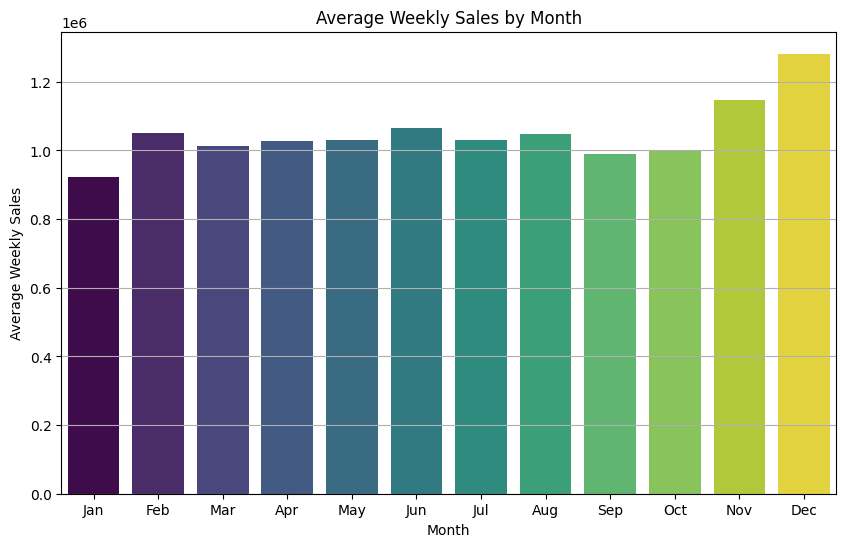

In [69]:
monthly_avg_sales = df.groupby('Month')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_avg_sales, x='Month', y='Weekly_Sales',  hue='Month', palette='viridis', legend=False)
plt.title('Average Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()

*  Average 'Weekly_Sales' for 'Holiday_Flag



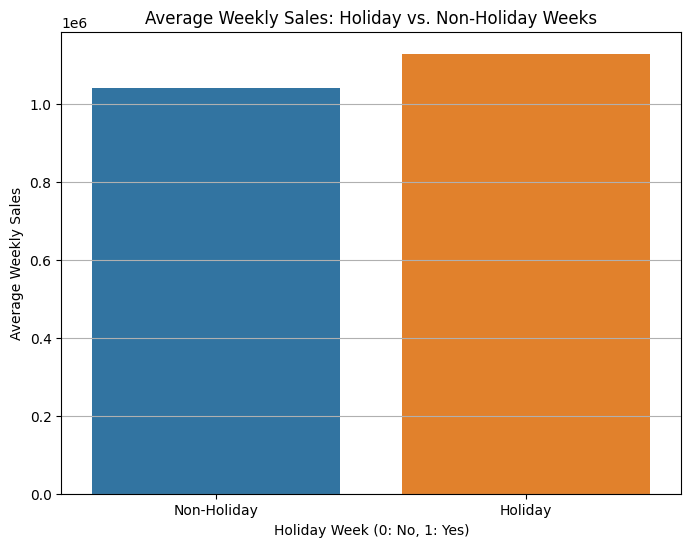

In [72]:
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=holiday_sales, x='Holiday_Flag', y='Weekly_Sales', hue='Holiday_Flag', legend=False)
plt.title('Average Weekly Sales: Holiday vs. Non-Holiday Weeks')
plt.xlabel('Holiday Week (0: No, 1: Yes)')
plt.ylabel('Average Weekly Sales')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'])
plt.grid(axis='y')
plt.show()

## C. Does temperature affect the weekly sales in any manner?


In [15]:
overall_temp_correlation = df['Weekly_Sales'].corr(df['Temperature'])
print(f"Overall Pearson correlation between Weekly_Sales and Temperature: {overall_temp_correlation:.4f}")

Overall Pearson correlation between Weekly_Sales and Temperature: -0.0638


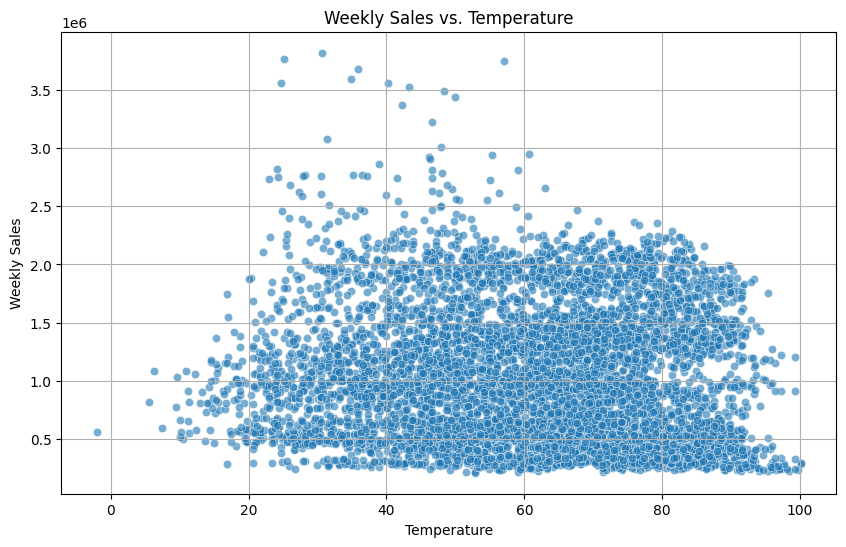

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', alpha=0.6)
plt.title('Weekly Sales vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

## D. How is the Consumer Price index affecting the weekly sales of various stores


In [17]:
overall_cpi_correlation = df['Weekly_Sales'].corr(df['CPI'])
print(f"Overall Pearson correlation between Weekly_Sales and CPI: {overall_cpi_correlation:.4f}")

Overall Pearson correlation between Weekly_Sales and CPI: -0.0726


In [18]:
store_cpi_correlations = df.groupby('Store')[['Weekly_Sales', 'CPI']].corr().unstack().iloc[:, 1]
print("Correlation between Weekly_Sales and CPI by Store:")
print(store_cpi_correlations.sort_values(ascending=True))

Correlation between Weekly_Sales and CPI by Store:
Store
36   -0.915095
35   -0.424107
14   -0.419755
30   -0.298188
43   -0.285686
27   -0.213082
18   -0.193541
15   -0.174467
21   -0.163649
19   -0.155341
10   -0.115374
28   -0.095908
29   -0.072530
2    -0.062431
33   -0.052271
22   -0.038602
45   -0.023548
24   -0.013684
6    -0.011357
25   -0.010914
20    0.058706
11    0.069781
12    0.084087
23    0.084248
40    0.113318
34    0.115437
8     0.120255
16    0.124285
26    0.131980
31    0.132887
13    0.163976
32    0.196782
1     0.225408
37    0.244507
7     0.289044
9     0.294805
5     0.308261
3     0.317250
17    0.348571
4     0.351157
42    0.360859
41    0.392293
39    0.428043
44    0.740150
38    0.812837
Name: (Weekly_Sales, CPI), dtype: float64


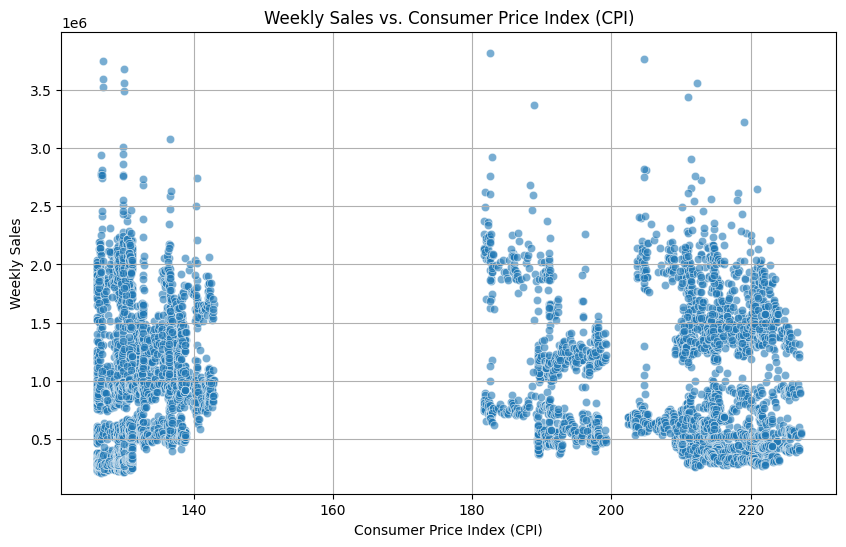

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales', alpha=0.6)
plt.title('Weekly Sales vs. Consumer Price Index (CPI)')
plt.xlabel('Consumer Price Index (CPI)')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

<Figure size 1200x700 with 0 Axes>

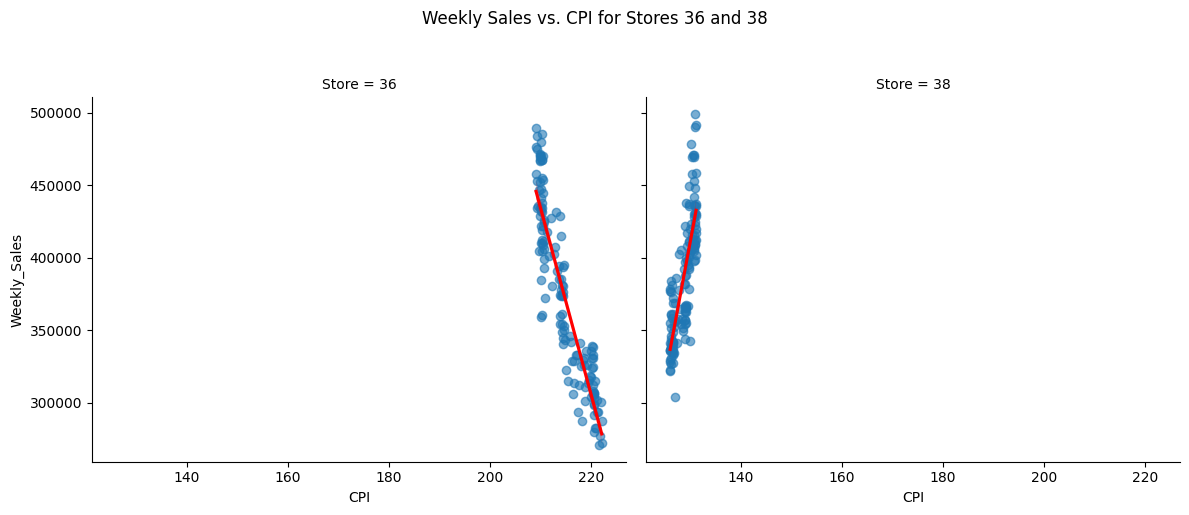

In [20]:
highest_negative_cpi_corr_store = store_cpi_correlations.idxmin()
highest_positive_cpi_corr_store = store_cpi_correlations.idxmax()

selected_cpi_stores_df = df[df['Store'].isin([highest_negative_cpi_corr_store, highest_positive_cpi_corr_store])]

plt.figure(figsize=(12, 7))
sns.lmplot(
    data=selected_cpi_stores_df,
    x='CPI',
    y='Weekly_Sales',
    col='Store',
    col_wrap=2,
    height=5,
    aspect=1.2,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)
plt.suptitle(f'Weekly Sales vs. CPI for Stores {highest_negative_cpi_corr_store} and {highest_positive_cpi_corr_store}', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## E. Top performing stores according to the historical data.




In [21]:
store_avg_sales = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)
print("Average Weekly Sales by Store (Descending):")
print(store_avg_sales)

Average Weekly Sales by Store (Descending):
Store
20    2.107677e+06
4     2.094713e+06
14    2.020978e+06
13    2.003620e+06
2     1.925751e+06
10    1.899425e+06
27    1.775216e+06
6     1.564728e+06
1     1.555264e+06
39    1.450668e+06
19    1.444999e+06
31    1.395901e+06
23    1.389864e+06
24    1.356755e+06
11    1.356383e+06
28    1.323522e+06
41    1.268125e+06
32    1.166568e+06
18    1.084718e+06
22    1.028501e+06
12    1.009002e+06
26    1.002912e+06
34    9.667816e+05
40    9.641280e+05
35    9.197250e+05
8     9.087495e+05
17    8.935814e+05
45    7.859814e+05
21    7.560691e+05
25    7.067215e+05
43    6.333247e+05
15    6.233125e+05
7     5.706173e+05
42    5.564039e+05
9     5.439806e+05
29    5.394514e+05
16    5.192477e+05
37    5.189003e+05
30    4.385796e+05
3     4.027044e+05
38    3.857317e+05
36    3.735120e+05
5     3.180118e+05
44    3.027489e+05
33    2.598617e+05
Name: Weekly_Sales, dtype: float64


In [22]:
top_performing_store = store_avg_sales.index[0]
highest_avg_sales = store_avg_sales.iloc[0]

worst_performing_store = store_avg_sales.index[-1]
lowest_avg_sales = store_avg_sales.iloc[-1]

sales_difference = highest_avg_sales - lowest_avg_sales

print(f"\nTop Performing Store (Store {top_performing_store}): Average Weekly Sales = {highest_avg_sales:,.2f}")
print(f"Worst Performing Store (Store {worst_performing_store}): Average Weekly Sales = {lowest_avg_sales:,.2f}")
print(f"Difference between Top and Worst Performing Stores: {sales_difference:,.2f}")


Top Performing Store (Store 20): Average Weekly Sales = 2,107,676.87
Worst Performing Store (Store 33): Average Weekly Sales = 259,861.69
Difference between Top and Worst Performing Stores: 1,847,815.18


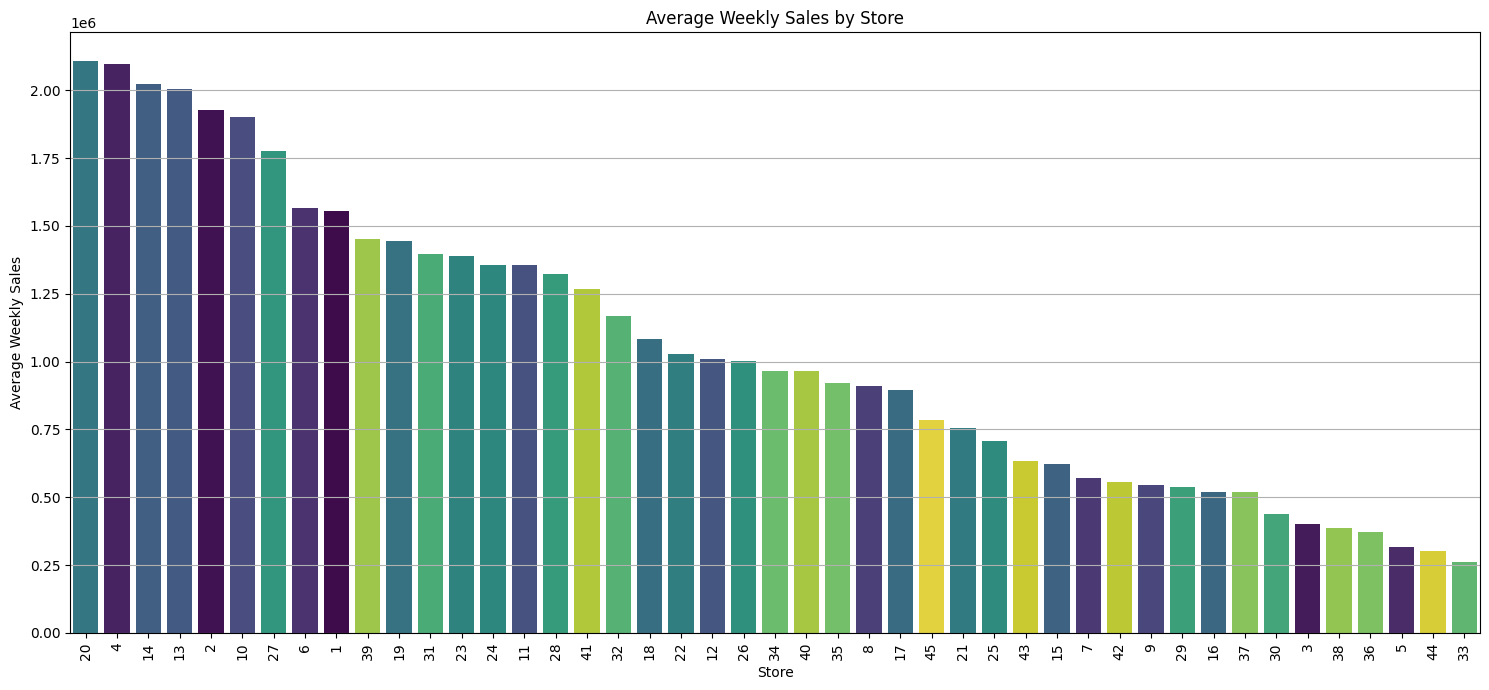

In [86]:
# Sort descending so highest top performing store to least performing store
store_avg_sales_sorted = store_avg_sales.sort_values(ascending=False)

plt.figure(figsize=(15, 7))
sns.barplot(
    data=store_avg_sales_sorted.reset_index(),
    x='Store',
    y='Weekly_Sales',
    hue='Store',
    palette='viridis',
    legend=False,
    order=store_avg_sales_sorted.index
)

plt.title('Average Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


##  F. The worst performing store, and how significant is the difference between the highest and lowest performing stores.


In [87]:
best_store = store_avg_sales_sorted.idxmax()
worst_store = store_avg_sales_sorted.idxmin()

best_value = store_avg_sales_sorted.max()
worst_value = store_avg_sales_sorted.min()

difference = best_value - worst_value

print(f"Top Performing Store: Store {best_store} → {best_value:.2f}")
print(f"Worst Performing Store: Store {worst_store} → {worst_value:.2f}")
print(f"Difference between highest & lowest: {difference:.2f}")


Top Performing Store: Store 20 → 2107676.87
Worst Performing Store: Store 33 → 259861.69
Difference between highest & lowest: 1847815.18


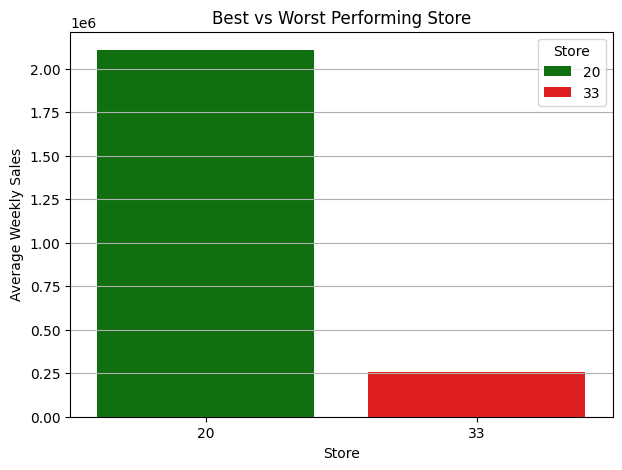

In [91]:
comp_df = pd.DataFrame({
    'Store': [best_store, worst_store],
    'Average_Weekly_Sales': [best_value, worst_value]
})

plt.figure(figsize=(7,5))
sns.barplot(data=comp_df, x='Store', y='Average_Weekly_Sales', hue='Store', palette=['green', 'red'])
plt.title("Best vs Worst Performing Store")
plt.ylabel("Average Weekly Sales")
plt.xlabel("Store")
plt.grid(axis='y')
plt.show()


#  2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

* Using SARIMAX time series forecasting model to predict weekly sales for each store.

In [94]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [99]:
stores = df['Store'].unique()
all_forecasts = []

for store in stores:
    store_df = df[df['Store'] == store].sort_values('Date')

    ts = store_df.set_index('Date')['Weekly_Sales']
    ts = ts.asfreq('W')

    model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,52),
                    enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)

    forecast = results.get_forecast(steps=12).predicted_mean

    store_forecast = forecast.reset_index()
    store_forecast.columns = ['Date', 'Predicted_Weekly_Sales']
    store_forecast['Store'] = store

    all_forecasts.append(store_forecast)

forecast_df = pd.concat(all_forecasts, ignore_index=True)
print(forecast_df)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estim

          Date  Predicted_Weekly_Sales  Store
0   2012-10-28                     0.0      1
1   2012-11-04                     0.0      1
2   2012-11-11                     0.0      1
3   2012-11-18                     0.0      1
4   2012-11-25                     0.0      1
..         ...                     ...    ...
535 2012-12-16                     0.0     45
536 2012-12-23                     0.0     45
537 2012-12-30                     0.0     45
538 2013-01-06                     0.0     45
539 2013-01-13                     0.0     45

[540 rows x 3 columns]


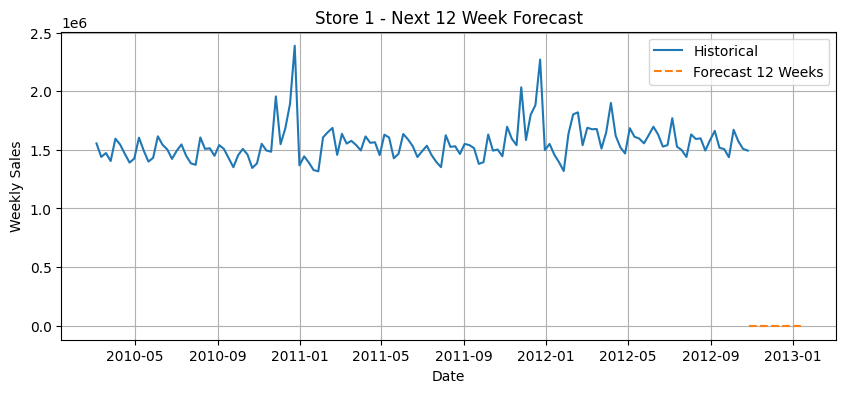

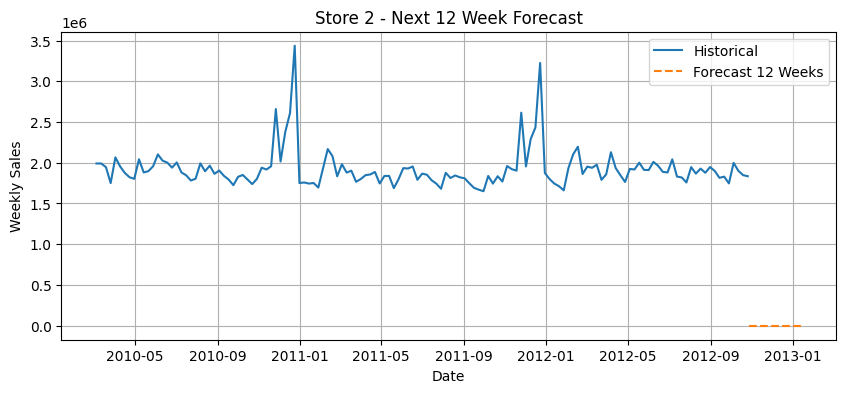

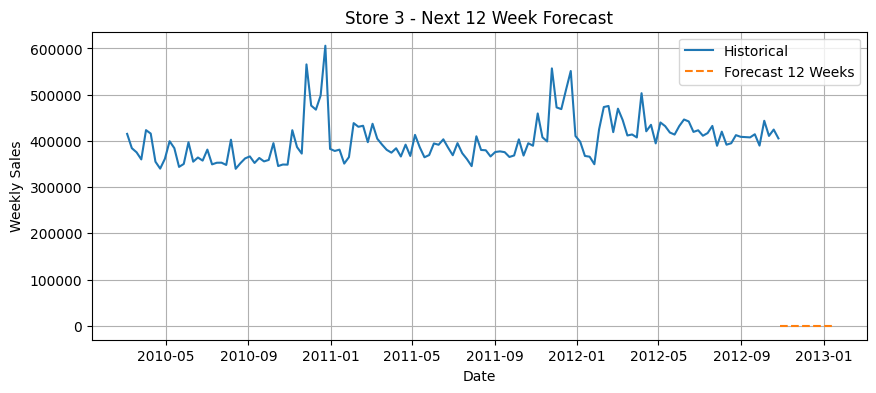

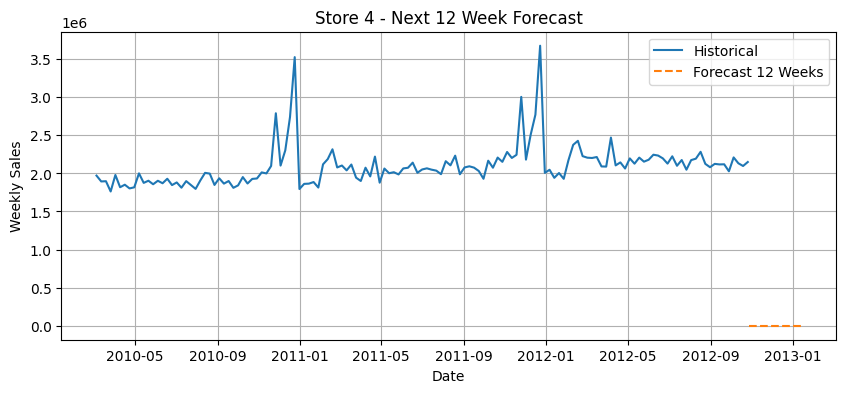

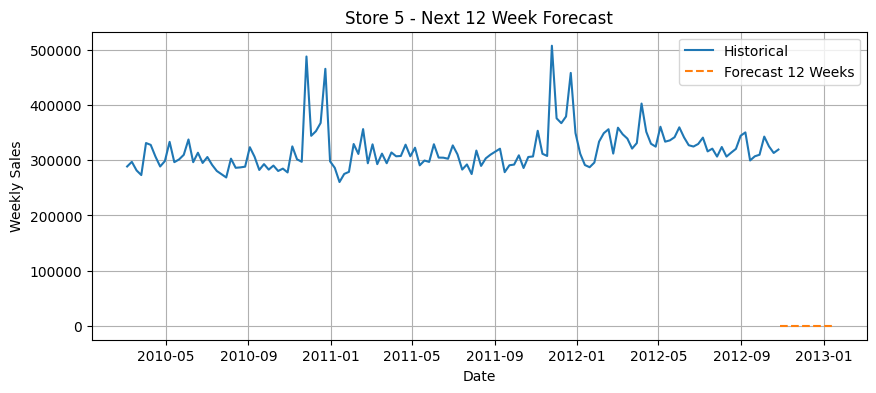

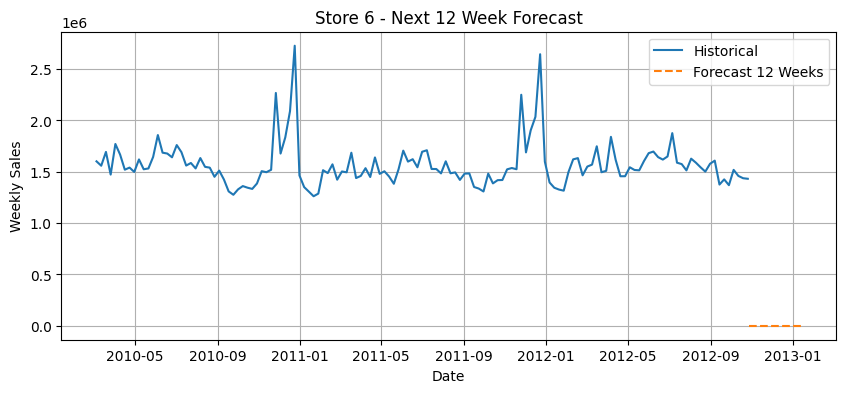

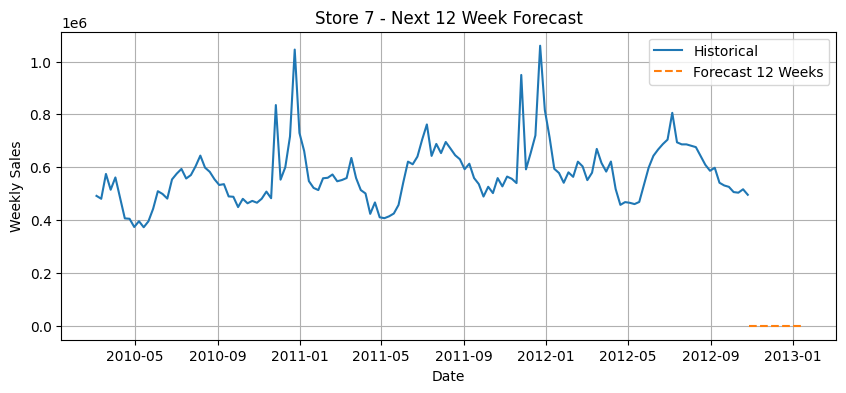

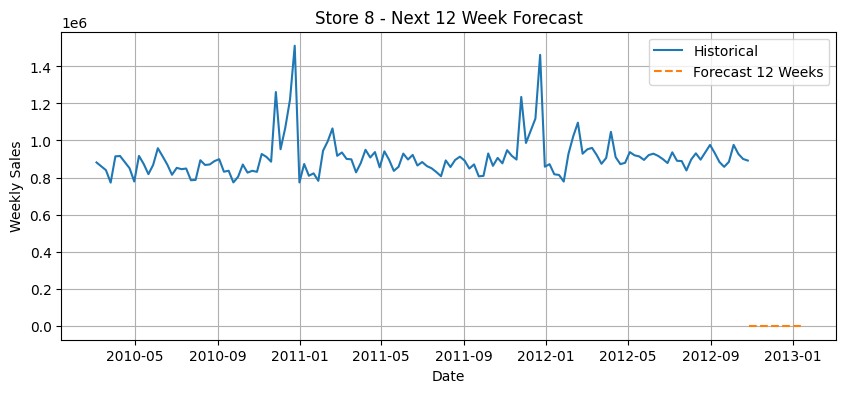

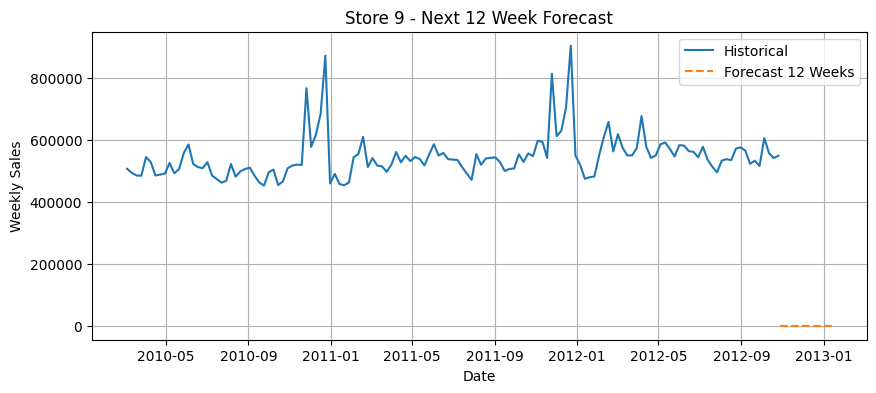

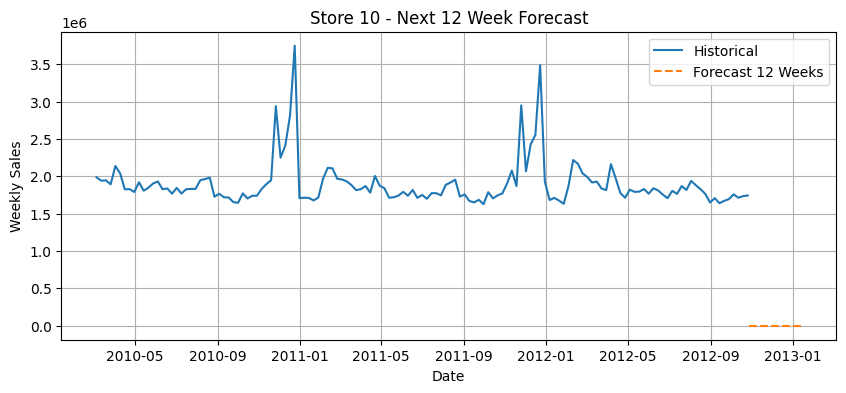

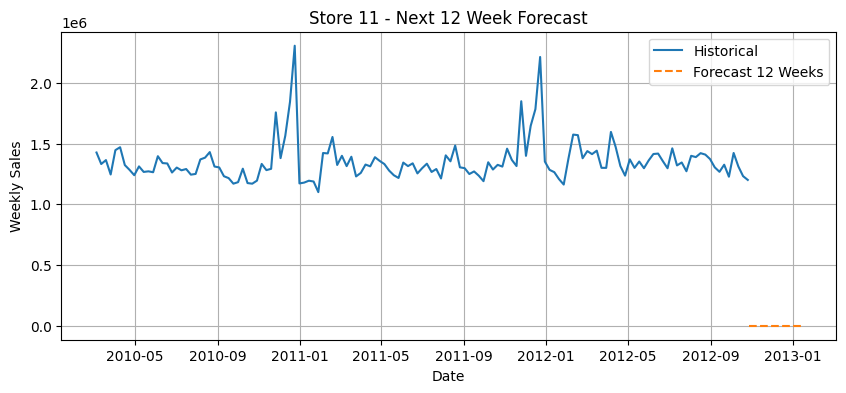

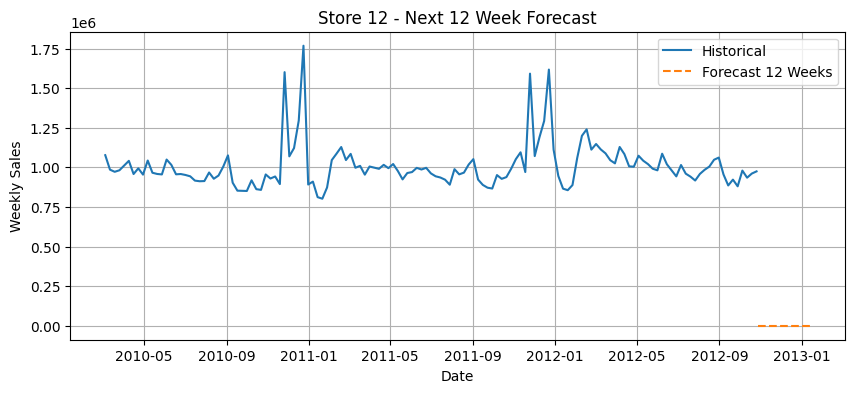

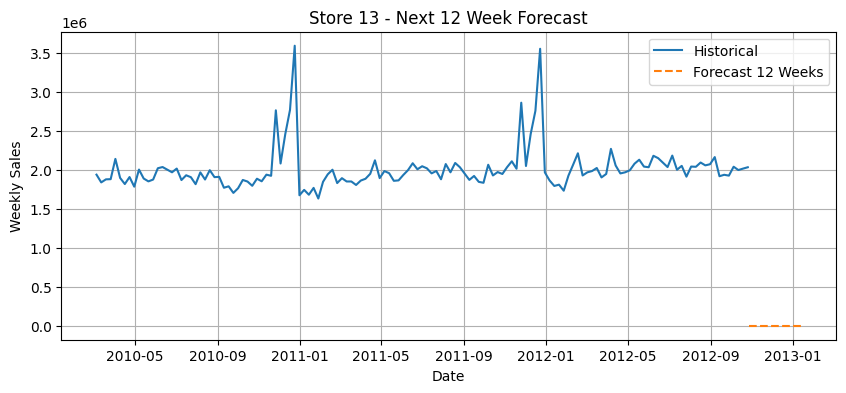

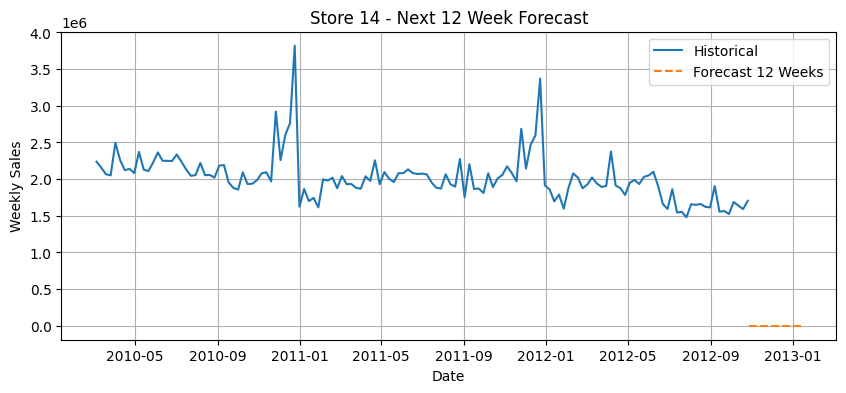

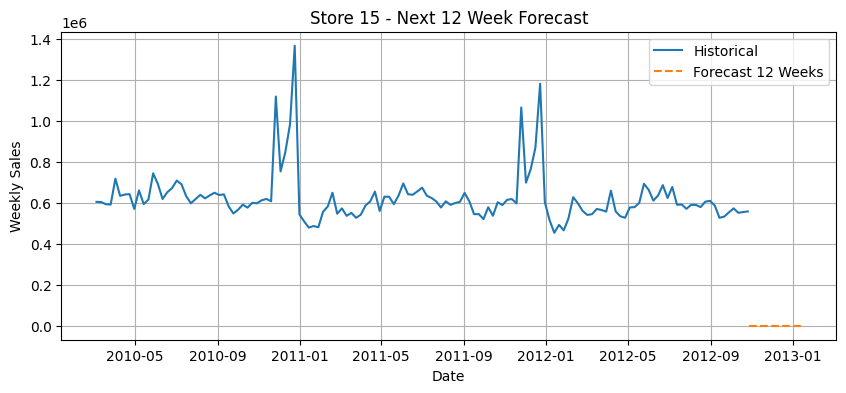

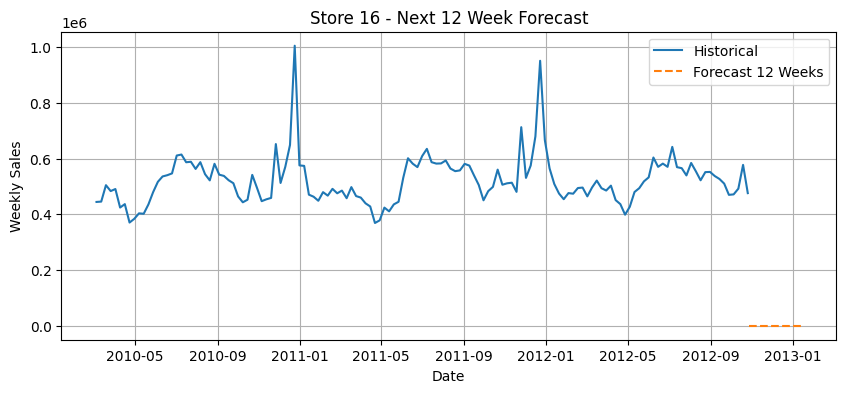

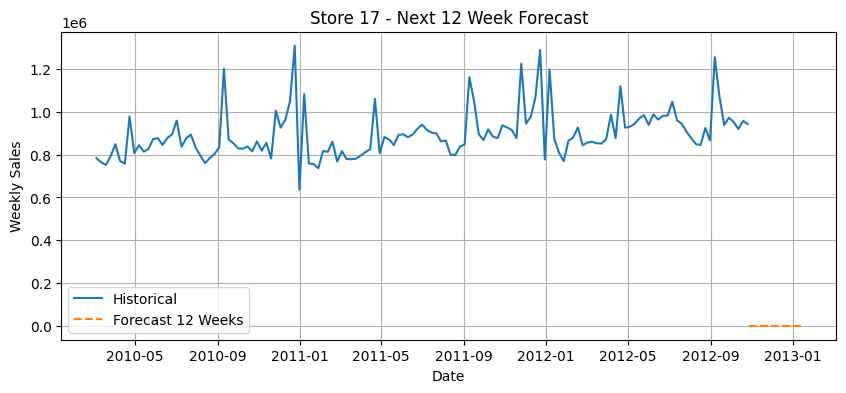

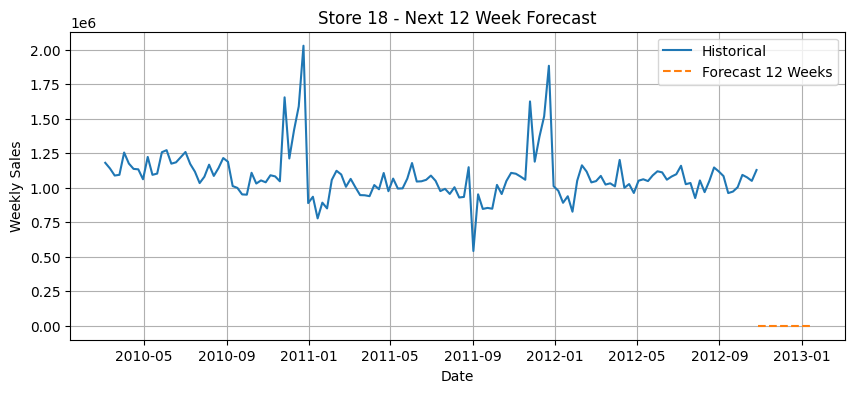

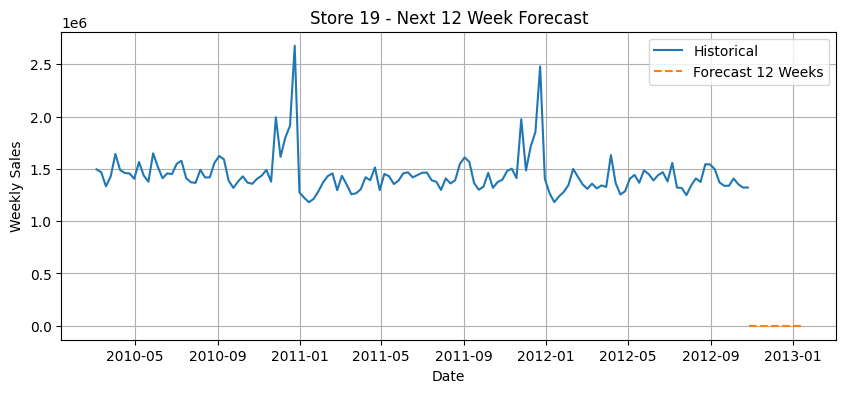

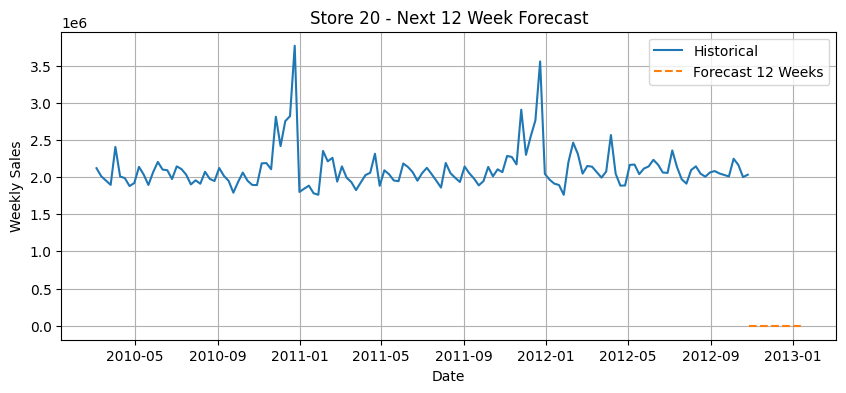

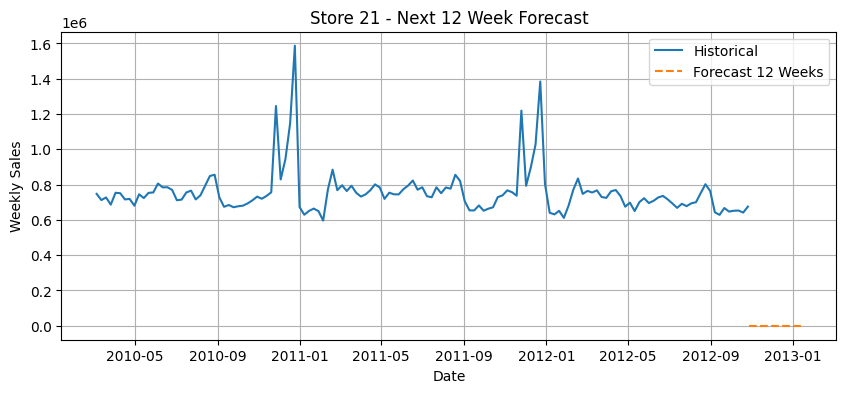

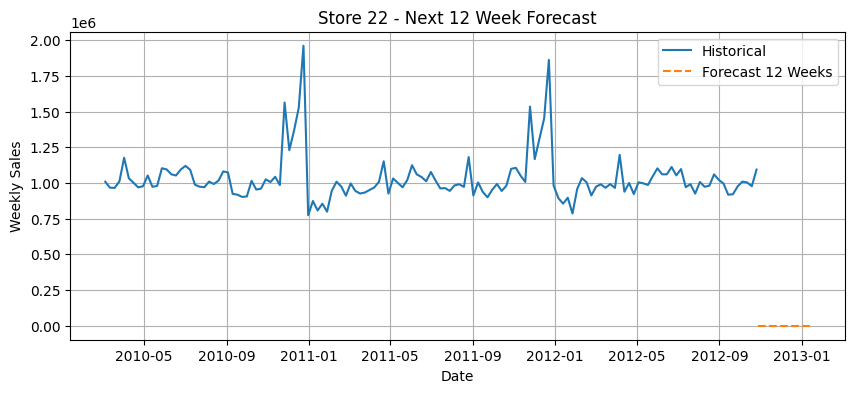

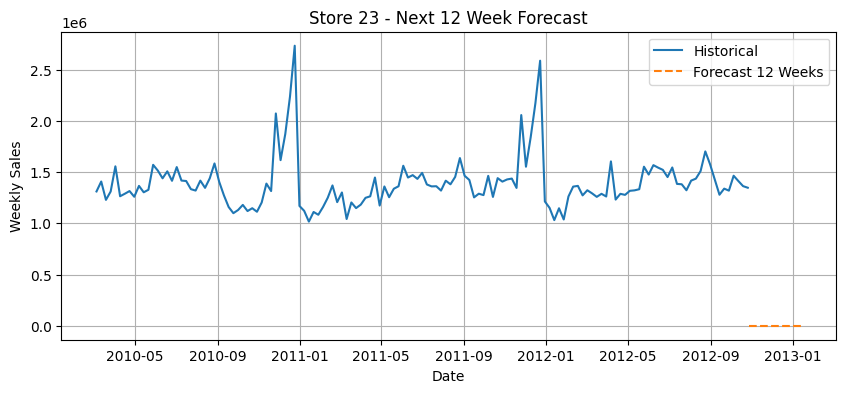

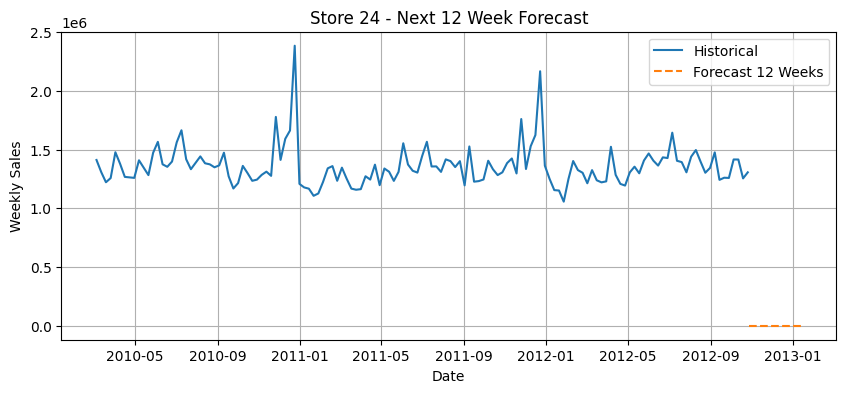

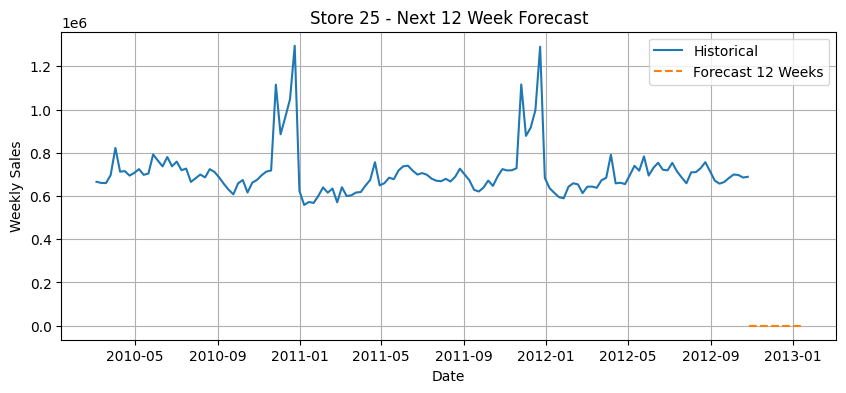

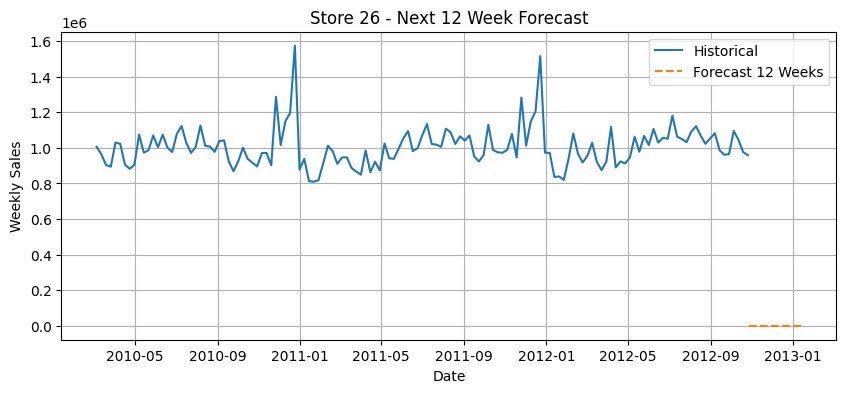

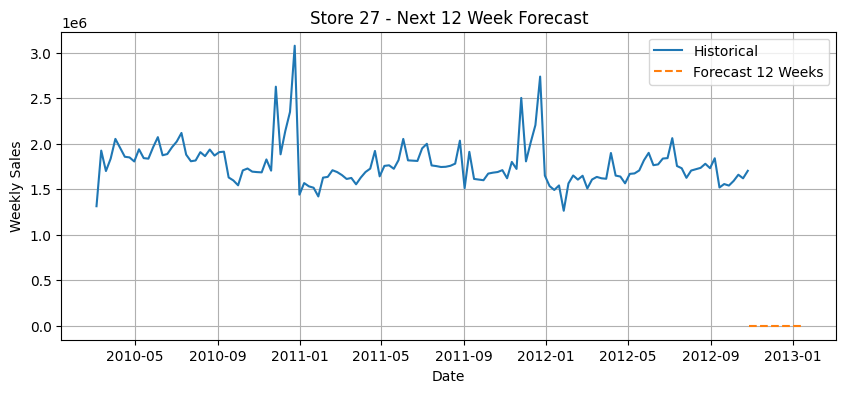

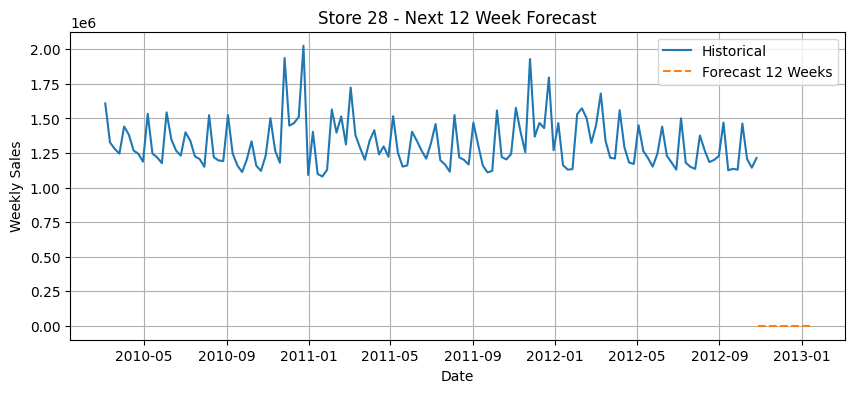

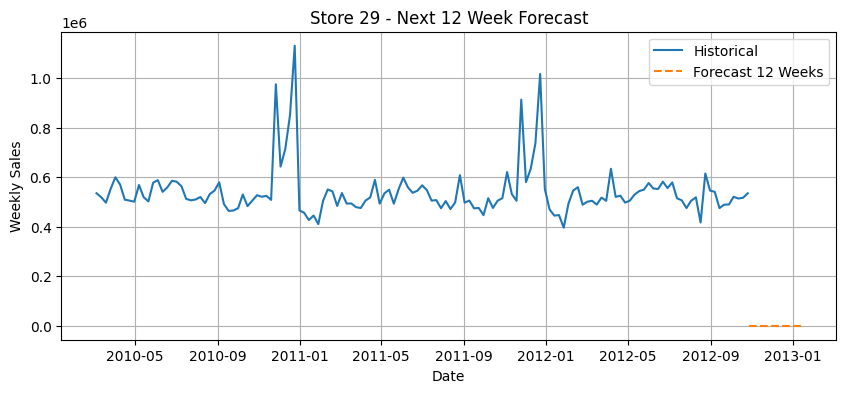

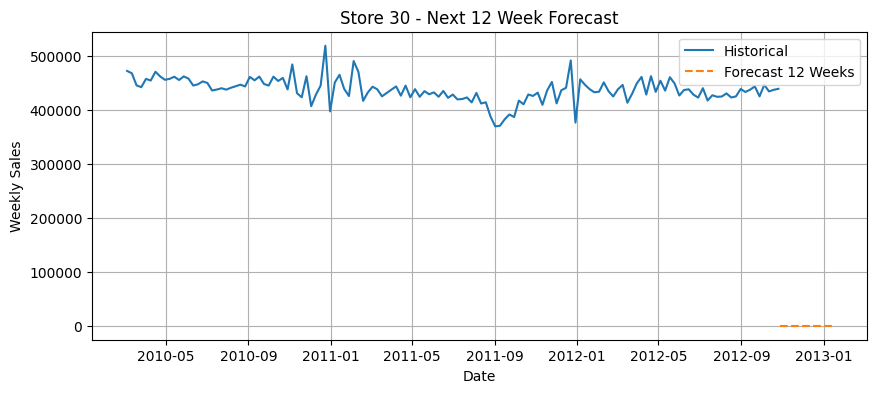

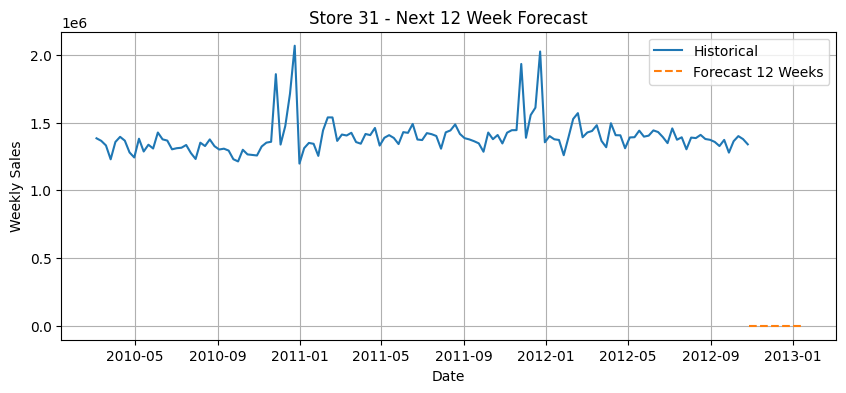

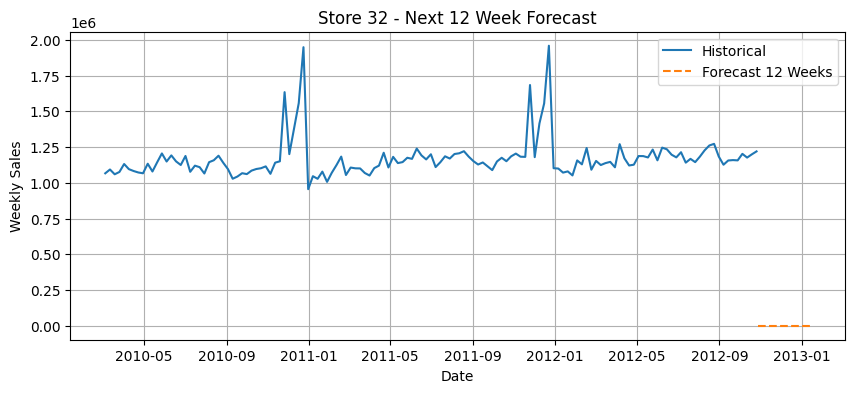

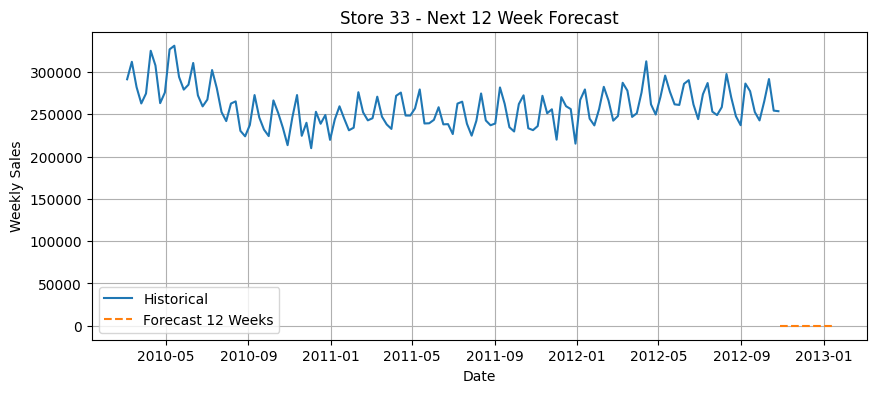

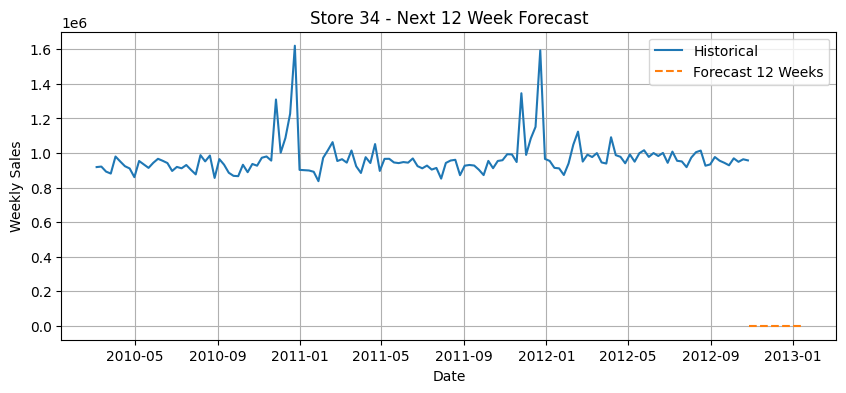

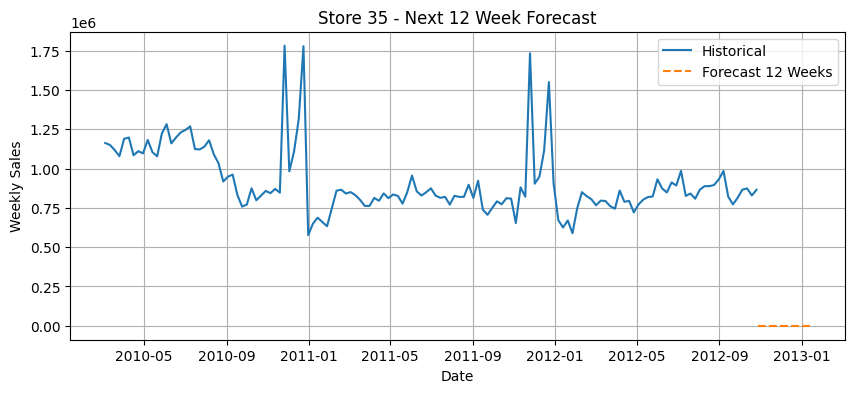

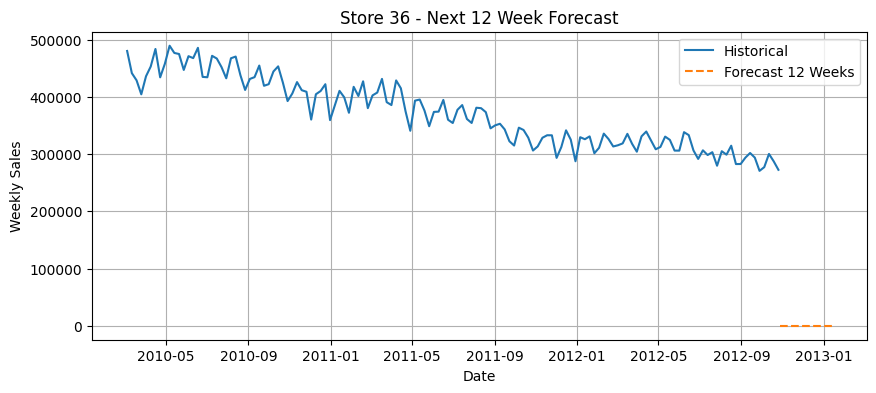

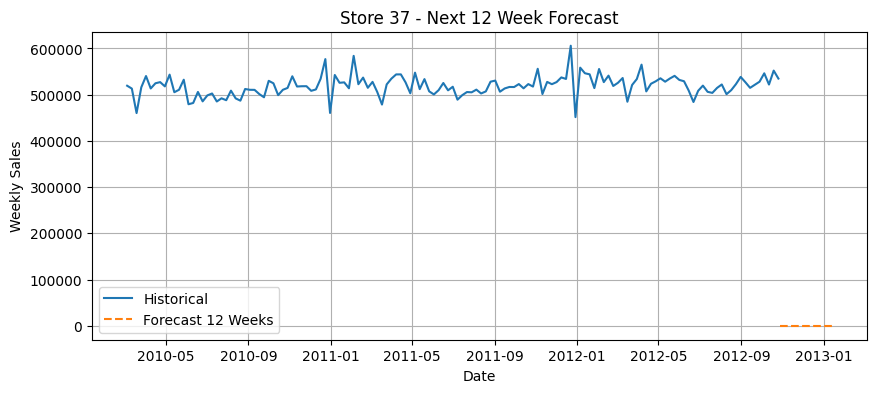

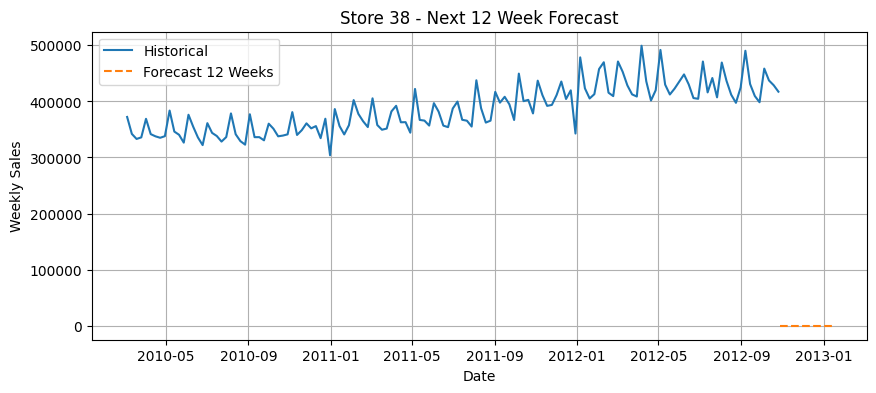

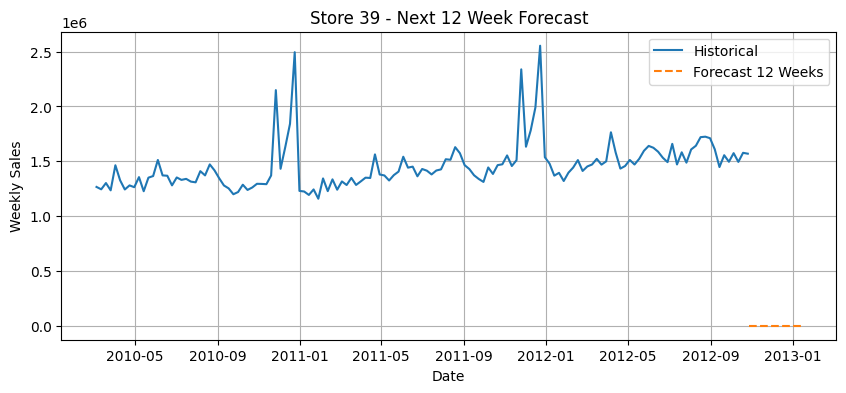

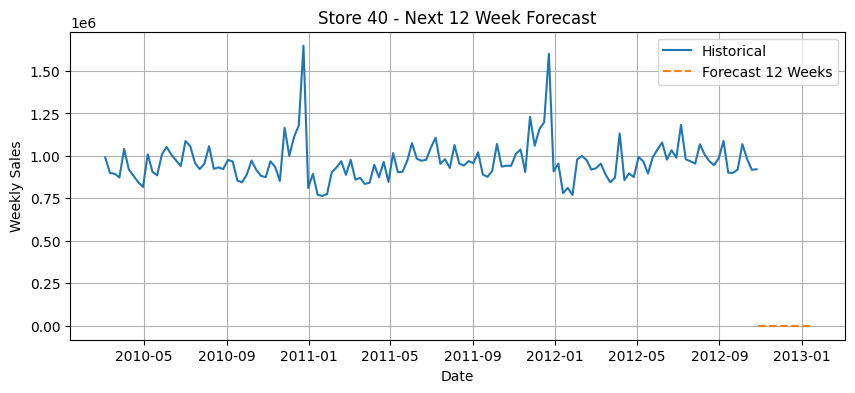

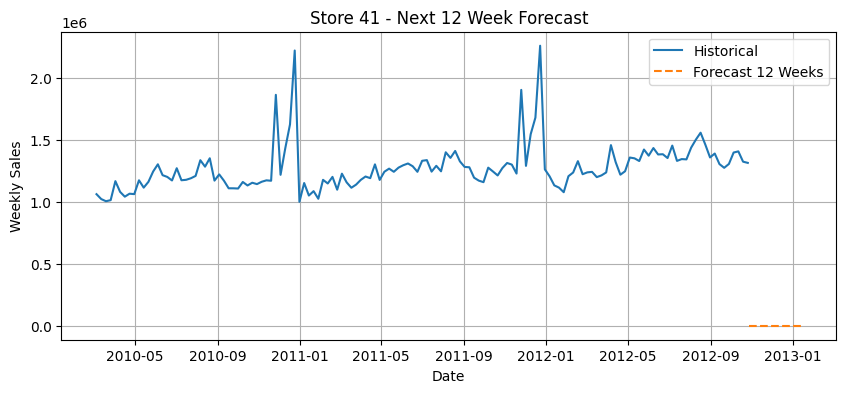

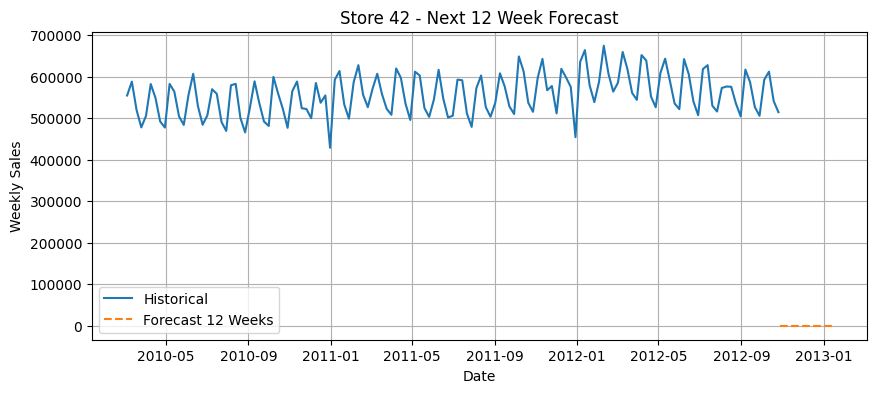

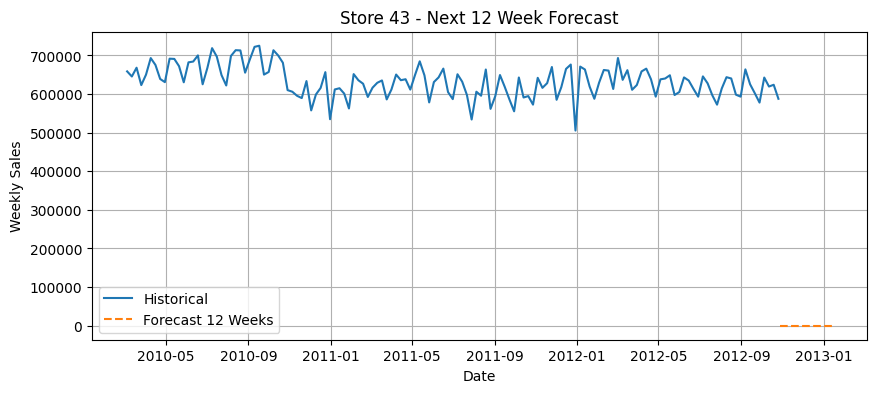

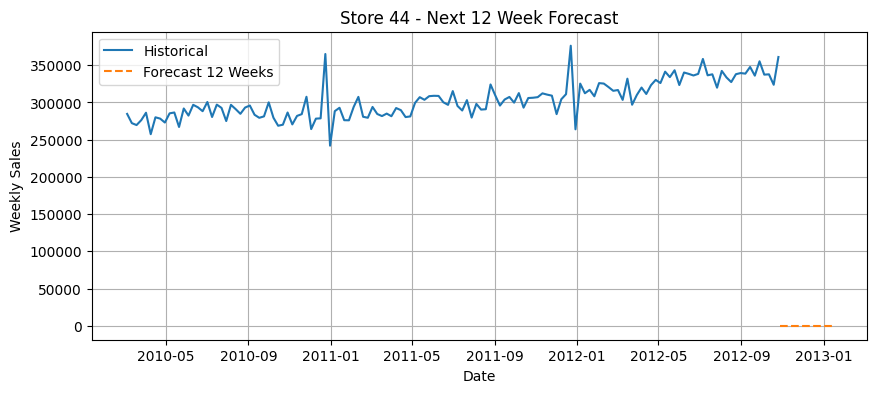

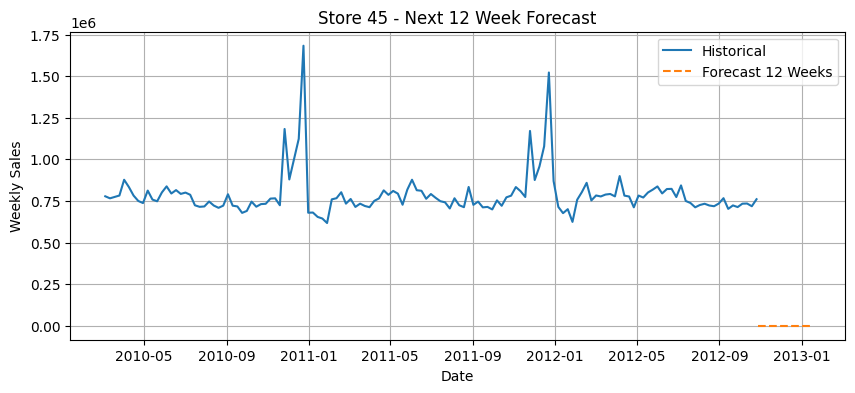

In [100]:
for store in stores:
    hist = df[df['Store']==store].set_index('Date')['Weekly_Sales']
    future = forecast_df[forecast_df['Store']==store].set_index('Date')['Predicted_Weekly_Sales']

    plt.figure(figsize=(10,4))
    plt.plot(hist.index, hist.values, label='Historical')
    plt.plot(future.index, future.values, label='Forecast 12 Weeks', linestyle='--')
    plt.title(f"Store {store} - Next 12 Week Forecast")
    plt.xlabel("Date")
    plt.ylabel("Weekly Sales")
    plt.legend()
    plt.grid(True)
    plt.show()
